<a href="https://colab.research.google.com/github/tomreitz/cs766-computer-vision-project/blob/main/code/10k_faces_data_exploration_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


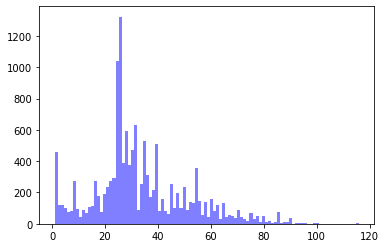

                      count unique  top  freq       mean        std  \
image                 13845  7      0    6126  NaN        NaN         
bytes                 13845  NaN    NaN  NaN   5084.22    787.801     
width                 13845  NaN    NaN  NaN   200        0           
height                13845  NaN    NaN  NaN   200        0           
age                   13845  NaN    NaN  NaN   33.319     17.8836     
gender                13845  NaN    NaN  NaN   0.504153   0.500001    
forehead              13845  NaN    NaN  NaN   0.0452675  0.0458149   
frown                 13845  NaN    NaN  NaN   0.134788   0.177633    
upper_eye_hood_left   13845  NaN    NaN  NaN   0.10055    0.127443    
upper_eye_hood_right  13845  NaN    NaN  NaN   0.10052    0.13142     
crows_feet_left       13845  NaN    NaN  NaN   0.106261   0.142483    
crows_feet_right      13845  NaN    NaN  NaN   0.106915   0.203185    
bunny_lines_left      13845  NaN    NaN  NaN   0.110198   0.160061    
bunny_

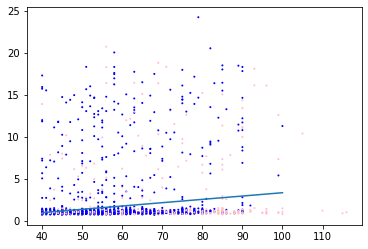

forehead
y=0.00092 x + -0.00207


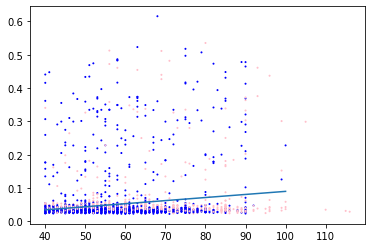

frown
y=0.00360 x + -0.03631


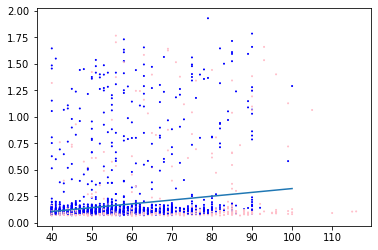

upper_eye_hood_left
y=0.00275 x + -0.03585


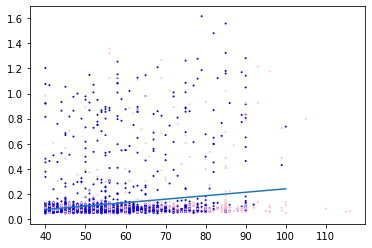

upper_eye_hood_right
y=0.00278 x + -0.03664


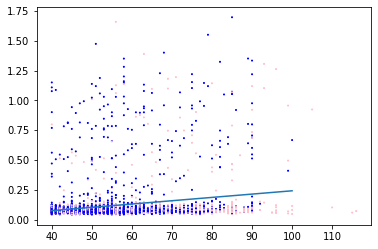

crows_feet_left
y=0.00270 x + -0.02834


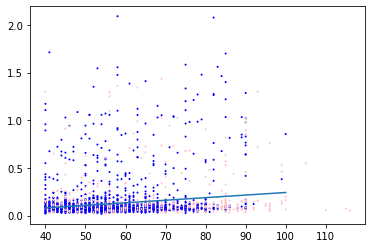

crows_feet_right
y=0.00266 x + -0.02623


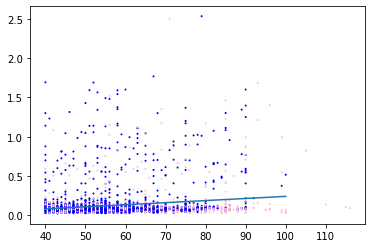

bunny_lines_left
y=0.00333 x + -0.05074


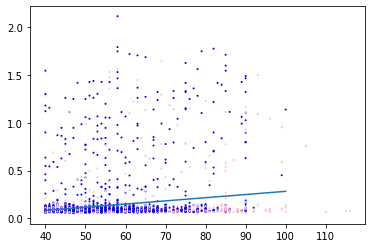

bunny_lines_right
y=0.00319 x + -0.04317


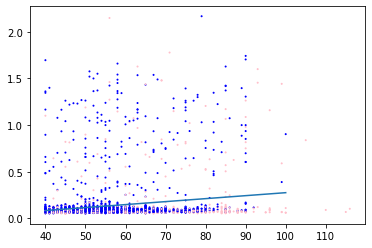

bags_left
y=0.00258 x + -0.04143


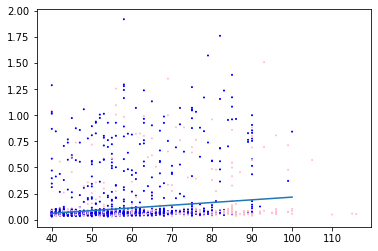

bags_right
y=0.00256 x + -0.03885


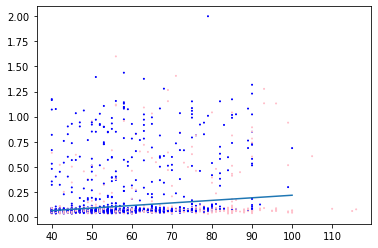

laugh_lines_left
y=0.00145 x + -0.02207


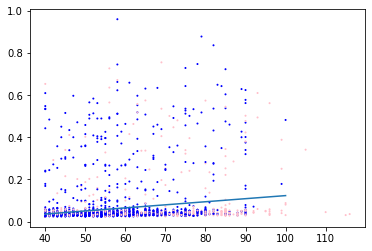

laugh_lines_right
y=0.00148 x + -0.02322


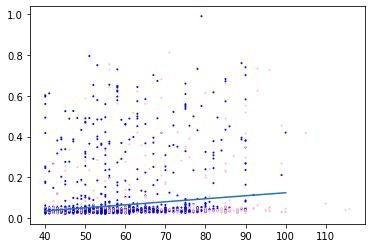

jowls_left
y=0.00242 x + -0.05053


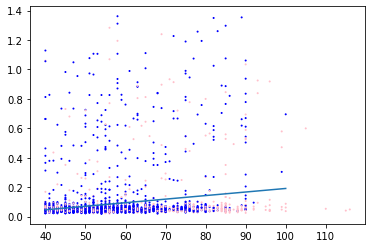

jowls_right
y=0.00247 x + -0.05211


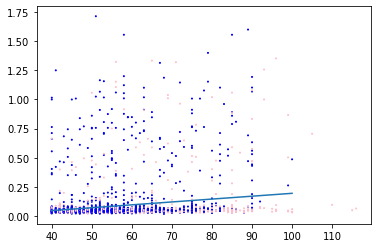

lip_lines
y=0.00292 x + -0.04308


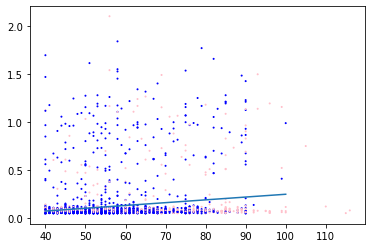

mental_crease
y=0.00172 x + -0.04766


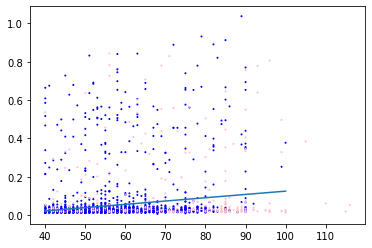

                   Predicted 0-19  Predicted 20-39  Predicted 40-59  \
Age group 0-19     72              1112             7                 
Age Group 20-39    16              3722             10                
Age Group 40-59    4               1344             12                
Age Group 60-79    6               475              9                 
Age Group 80-99    2               109              2                 
Age Group 100-119  0               5                0                 

                   Predicted 60-79  Predicted 80-99  Predicted 100-119  
Age group 0-19     0                1                0                  
Age Group 20-39    3                0                0                  
Age Group 40-59    3                1                0                  
Age Group 60-79    4                2                0                  
Age Group 80-99    1                0                0                  
Age Group 100-119  1                0                0          

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np
import math
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

df = pd.read_csv("10k-utkfaces.csv") # <----------------- You need to uplaod this into the notebook
#print(df.loc[:, df.columns!='image'].transpose())

# Add some derived columns to the data:
#df['total_lines'] = df.forehead + df.frown + df.upper_eye_hood_left + df.upper_eye_hood_right + df.crows_feet_left + df.crows_feet_right + df.bunny_lines_left + df.bunny_lines_right+ df.bags_left + df.bags_right + df.laugh_lines_left + df.laugh_lines_right + df.jowls_left + df.jowls_right + df.lip_lines + df.mental_crease
df['dim'] = df.width * df.height
df['age_group'] = (df.age/20).apply(np.floor)

# Filter the data for decent-sized images (some in this set are tiny, like 50x50 pixels)
# and faces that might actually be old enough to have some wrinkles.
#df = df.query('width>=200 & height>=200')
#df = df.reset_index(drop=True)
n, bins, patches = plt.hist(df['age'], 100, facecolor='blue', alpha=0.5)
plt.show()


# Show some descriptive statistics of the dataset:
print(df.describe(include='all').transpose())

rhytide_cols = ['total', 'forehead', 'frown', 'upper_eye_hood_left', 'upper_eye_hood_right', 'crows_feet_left', 'crows_feet_right', 'bunny_lines_left', 'bunny_lines_right', 'bags_left', 'bags_right', 'laugh_lines_left', 'laugh_lines_right', 'jowls_left', 'jowls_right', 'lip_lines', 'mental_crease']
#colors = {'male':'blue', 'female':'pink'}
colors = {0:'blue', 1:'pink'}
# Print out a scatterplot of rhytide values vs. age for each rhytide type. Any correlations? doesn't look like it :(
# (Commented out to reduce notebook output)
for rhy in rhytide_cols:
  print(rhy)
  data = df.loc[:, ['dim', 'age', 'gender', rhy]]
  #data = data.loc[data['dim']>10000]
  data = data.loc[data['age']>=40]
  #data = data.loc[data[rhy]>=0.00001]
  #data = data.loc[data[rhy]<0.2]
  #data = data.loc[1:30]
  data = data.reset_index(drop=True)
  slope, intercept, r_value, p_value, std_err = stats.linregress(data.loc[:,'age'],data.loc[:,rhy])
  print('y={0:.5f} x + {1:.5f}'.format(slope,intercept))
  plt.scatter(data.loc[:,'age'], data.loc[:,rhy], s=1, c=data.loc[:,'gender'].map(colors)) # , alpha=0.5
  plt.plot([40,100], [slope*40+intercept, slope*100+intercept])
  plt.show()

# For training, we need to strip out all columns except the rhytide types
keep_cols = ['age_group', 'forehead', 'frown', 'upper_eye_hood_left', 'upper_eye_hood_right', 'crows_feet_left', 'crows_feet_right', 'bunny_lines_left', 'bunny_lines_right', 'bags_left', 'bags_right', 'laugh_lines_left', 'laugh_lines_right', 'jowls_left', 'jowls_right', 'lip_lines', 'mental_crease']
data = df.loc[:, keep_cols]

# Make our training (random 80%) and testing (other 20%) sets
#train_80 = data.sample(frac = 0.8)
#test_20 = data.drop(train_80.index)

# Set up and fit a KNN model
#nrst_neigh = NearestNeighbors(n_neighbors = 30, algorithm = 'ball_tree')
#nrst_neigh.fit(train_80)

# Calculate nearest neighbors for each element of the test set:
#distances, indices = nrst_neigh.kneighbors(test_20)

x = data.drop("age_group", axis=1)
y=np.ravel(data['age_group'])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, random_state=50)
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
svc_model = SVC()
svc_model.fit(x_train, y_train)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
y_predict = svc_model.predict(x_test)
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1,2,3,4,5]))
confusion = pd.DataFrame(cm,
  index=['Age group 0-19', 'Age Group 20-39', 'Age Group 40-59', 'Age Group 60-79',
         'Age Group 80-99', 'Age Group 100-119'],
  columns=['Predicted 0-19', 'Predicted 20-39', 'Predicted 40-59', 'Predicted 60-79',
           'Predicted 80-99', 'Predicted 100-119'])
print(confusion)

# Now we want to compute a prediction error array for each test set element.
#errors = np.zeros(len(test_20))
#random_guess_error = np.zeros(len(test_20))
#for i in range(1,len(test_20)):
  # Compare average of the ages corresponding to the nearest neighbors vs. the true age
  # (we look up both in the original dataset, since they've been stripped out of the train/test sets)
#  errors[i] = np.average(df.loc[indices[i],'age']) - df.loc[test_20.index[i], 'age']
#  random_guess_error[i] = 33.231067 - df.loc[test_20.index[i], 'age']

# Plot a histogram of error values, to see if there's any skew (more error in younger faces?)
#num_bins = 100
#n, bins, patches = plt.hist(errors, num_bins, facecolor='blue', alpha=0.5)
#plt.show()

# Show scatter plot of error in individual elements of the test set vs. age, colored by gender
#plt.scatter(errors, df.loc[test_20.index, 'age'], c=df.loc[test_20.index, 'gender'].map(colors), s=2, alpha=0.5)
#plt.show()

# Is our average prediction error any better than random guessing? (if we always predict the mean age of the dataset)
#print('Avg. error:')
#print(sum(abs(errors))/len(test_20))
#print('Random guess error:')
#print(sum(abs(random_guess_error))/len(test_20))


Observations:

*   Scatterplots show that there's *lots* of noise. Majority of data points have ryhtide values lying in [0 - 0.1], but there are many outliers with values of 2.0 or more which throw things off.
*   Lines of best fit all have *very shallow* positive slope, meaning that wrinkles tend to increase with age. But at any given age you can find many datapoints at higher and lower ages with rhytide values that are higher or lower than the best-fit value.
* In both datasets (UTK Faces and IMDB/Wiki), samples are not evenly distributed by age. We have many more face images at ages 20-40 than older or younger ages. This may be throwing off age estimation.
* In addition to KNN prediction of exact age, I also tried bucketing samples by age group, and using SVM to classify face images into an age bucket. But you can see in the confusion matrix at the end of the notebook that SVM basically classifies almost every face as 20-39 (which is where the average age of the data set lies), which probably means that SVM is not finding a hyperplane that cleanly separates the data, since its so noisy.


Where do we go from here?

* I think we could try to manually curate the data, removing small/poor quality images from the dataset, or removing face images with beards, bangs, eyeglasses, and other obstructions that might be rhytide measurement-outliers. We probably don't need a huge dataset, a few thousand images may be enough.